In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Caminho do arquivo JSON
file_path = "mapa_dividendos_12meses.json"

# Carregar o arquivo JSON
try:
    df = pd.read_json(file_path, orient="records")
    print("Arquivo JSON carregado com sucesso.")
except Exception as e:
    print(f"Erro ao carregar o JSON: {e}")


Arquivo JSON carregado com sucesso.


In [20]:
# Excluir a coluna 'ativo' e converter as colunas para float
df_numeric = df.set_index('ativo').apply(pd.to_numeric, errors='coerce')

# Calcular o percentual de NaN em cada coluna
percentual_nan = df_numeric.isna().mean() * 100

# Exibir o percentual de NaN em cada coluna
print("Percentual de NaN em cada coluna:")
print(percentual_nan)

# Exibir as primeiras linhas do DataFrame numérico
df_numeric.head()


Percentual de NaN em cada coluna:
2023-11    82.527881
2023-12    10.780669
2024-01     7.806691
2024-02     8.921933
2024-03     7.434944
2024-04     7.434944
2024-05     5.204461
2024-06     5.947955
2024-07     4.460967
2024-08     7.063197
2024-09     6.691450
2024-10     7.063197
2024-11    38.661710
dtype: float64


,2023-11,2023-12,2024-01,2024-02,2024-03,2024-04,2024-05,2024-06,2024-07,2024-08,2024-09,2024-10,2024-11
ativo,,,,,,,,,,,,,
KNIP11.SA,NaN,0.700000,0.750000,0.860000,0.950000,1.05000,1.050000,0.800000,0.850000,0.87,0.76,0.750000,0.70
KNCR11.SA,NaN,1.007045,1.003200,1.068227,0.943604,0.94722,0.997074,0.998729,0.998729,0.95,0.95,0.948793,1.02
XPML11.SA,0.846939,0.896759,0.919937,0.899938,0.899938,0.91000,0.920000,0.920000,0.920000,0.92,0.92,0.920000,NaN
HGLG11.SA,NaN,1.100000,1.100000,1.100000,1.100000,1.10000,1.100000,1.100000,1.100000,1.10,1.10,1.100000,1.10
BTLG11.SA,0.758154,0.758154,0.808032,0.780000,0.760000,0.76000,0.760000,0.760000,0.760000,0.76,0.78,0.780000,NaN


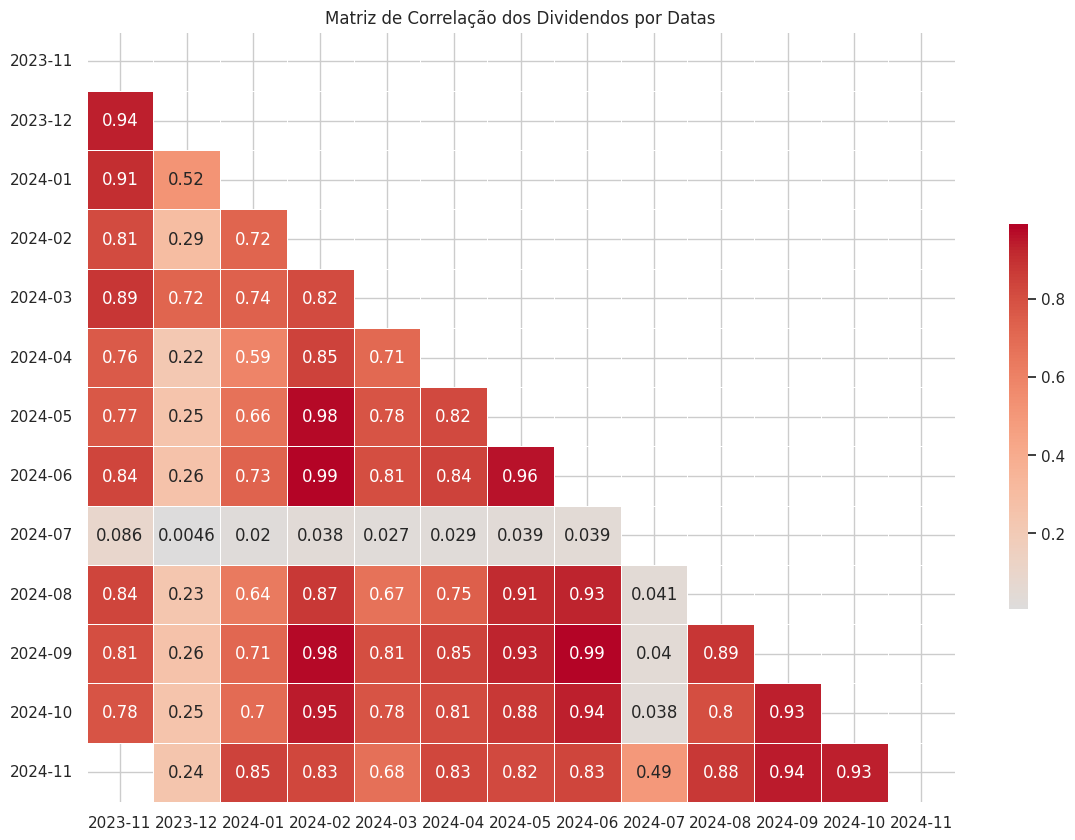

In [26]:
# Calcular a matriz de correlação
correlacao = df_numeric.corr()

# Criar uma máscara para a parte inferior
mask = np.triu(np.ones_like(correlacao, dtype=bool))

# Definir o tamanho da figura
plt.figure(figsize=(14, 10))

# Plotar a matriz de correlação com a máscara aplicada
sns.heatmap(correlacao, 
            annot=True, 
            cmap="coolwarm", 
            center=0, 
            mask=mask, 
            linewidths=.5, 
            cbar_kws={"shrink": .5})

# Adicionar título
plt.title("Matriz de Correlação dos Dividendos por Datas")

# Exibir o gráfico
plt.show()
